<a href="https://colab.research.google.com/github/Adel5749/Cohort6-Assignment1/blob/main/Adel_Assignment_1_GoogleColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This Assignment was done by Google Colab

In [29]:
from google.colab import files
#uploaded = files.upload()


In [30]:
import os
print(os.getcwd())
print(os.listdir())


/content
['.config', 'RuralMunicipality.shx', 'RuralMunicipality.prj', 'RuralMunicipality.shp', 'RuralMunicipality.sbn', 'saskatchewan.shp', 'RuralMunicipality.shp.xml', 'df_2.csv', 'saskatchewan.prj', 'RuralMunicipality.sbx', 'df_1.csv', 'saskatchewan.dbf', 'df_1 (1).csv', 'RuralMunicipality.cpg', 'df_2 (1).csv', 'saskatchewan.cpg', 'RuralMunicipality.dbf', 'saskatchewan.shx', 'sample_data']


In [31]:
import datetime
import socket

# Get local time
local_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Get computer ID or hostname
computer_id = socket.gethostname()

# Print output with local time and computer ID
print('Assignment 1: Solutions by Adel Baabbad') # Please change your name here
print('Local Time:', local_time)
print('Computer ID:', computer_id)

Assignment 1: Solutions by Adel Baabbad
Local Time: 2024-05-15 19:47:14
Computer ID: 5b2df9895562


In [32]:
# Import Libraries Pandas, NumPy, Geopandas, Matplotlib, Seaborn
import pandas as pd
import numpy as np
import geopandas as gpd # GIS
import seaborn as sb # Parof of matplotlib for Data Viz
import matplotlib.pyplot as plt # plotting data

In [33]:
df_1 = pd.read_csv('df_1.csv')
df_2 = pd.read_csv('df_2.csv')


**Question 1**
Follow the instructions in slack


In [34]:
#Remove rows that contain empty cells
df_1_clean = df_1.dropna()
df_2_clean = df_2.dropna()

# Capitalize and remove empty spaces from front and end.
df_1_clean['RM'] = df_1_clean['RM'].astype('str').str.capitalize().str.strip()
df_2_clean['RM'] = df_2_clean['RM'].astype('str').str.capitalize().str.strip()

# Remove duplicates
df_1_clean.drop_duplicates(subset=['RM'],keep='first', inplace=True)
df_2_clean.drop_duplicates(subset=['RM'],keep='first', inplace=True)

# Merge two clean data files
df_final = pd.merge(df_1_clean, df_2_clean,how='outer')

# Print merge dataframe
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   RM      502 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB
None


# **Question 2**
Merge Shapefile(provided in Cohort 6 Repo) and create a map by using DataFrame.plot() with cleaned and maximized number of RMs in df_1




In [20]:
from google.colab import files
uploaded = files.upload()


Saving RuralMunicipality.cpg to RuralMunicipality.cpg
Saving RuralMunicipality.dbf to RuralMunicipality.dbf
Saving RuralMunicipality.prj to RuralMunicipality.prj
Saving RuralMunicipality.sbn to RuralMunicipality.sbn
Saving RuralMunicipality.sbx to RuralMunicipality.sbx
Saving RuralMunicipality.shp to RuralMunicipality.shp
Saving RuralMunicipality.shp.xml to RuralMunicipality.shp.xml
Saving RuralMunicipality.shx to RuralMunicipality.shx


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   RM        296 non-null    object  
 1   RMNM      296 non-null    object  
 2   geometry  296 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 7.1+ KB
None


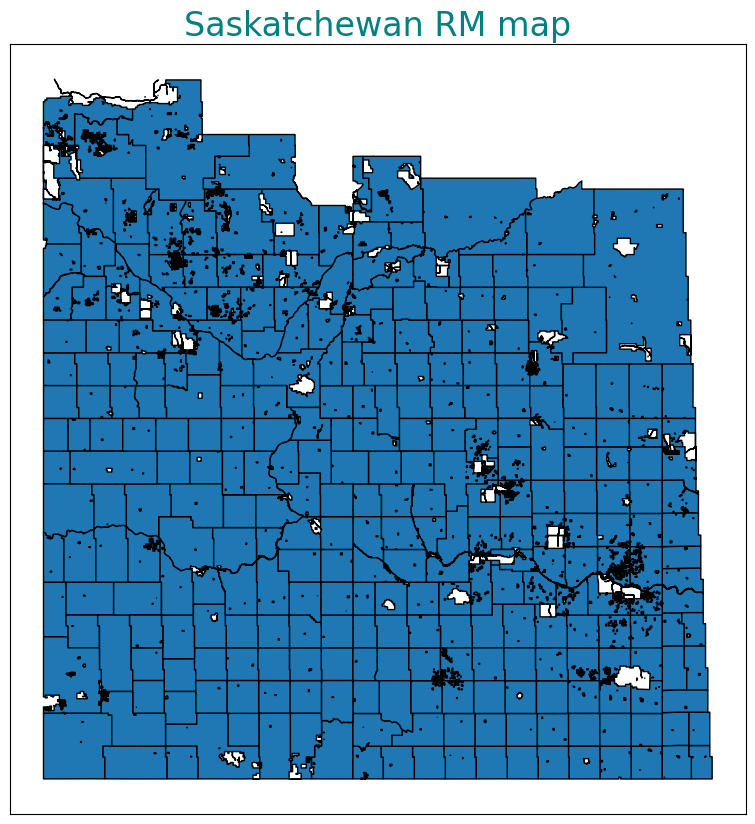

In [22]:
# Reading GIS
gdf_rm=gpd.read_file('RuralMunicipality.shp')
# Selecting geometry data
gdf_rm_clean=gdf_rm[['RMNO', 'RMNM', 'geometry']]
gdf_rm_clean=gdf_rm_clean.to_crs(4326)
# Converting RMNO column type to String
gdf_rm_clean['RMNO']=gdf_rm_clean['RMNO'].astype('int').astype('str').str.strip()

gdf_rm_final=pd.merge(gdf_rm_clean.rename(columns={'RMNO':'RM'}), df_final, on='RM',how='inner')
print(gdf_rm_final.info())

# Creating the map
gdf_rm_final.plot(figsize=[10,10],edgecolor='black')
plt.title('Saskatchewan RM map', color='teal', size=24)
plt.tick_params(top=False, bottom=False, left=False, right=False,labelleft=False, labelbottom=False)
plt.show()

In [25]:
from google.colab import files
uploaded = files.upload()

Saving saskatchewan.cpg to saskatchewan.cpg
Saving saskatchewan.dbf to saskatchewan.dbf
Saving saskatchewan.prj to saskatchewan.prj
Saving saskatchewan.shp to saskatchewan.shp
Saving saskatchewan.shx to saskatchewan.shx


<Axes: title={'center': 'Saskatchewan RM map with provincial boundaries'}>

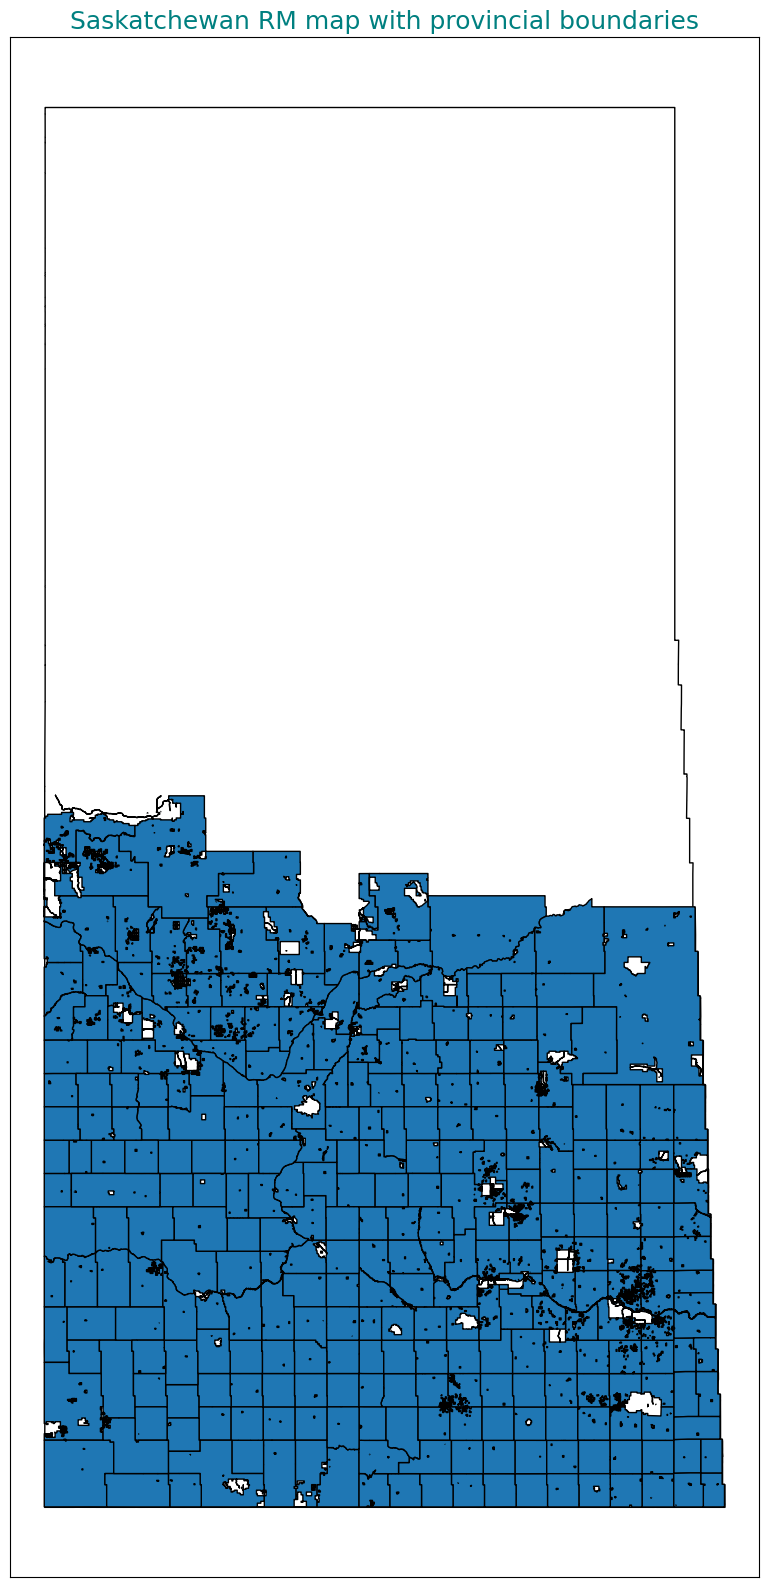

In [28]:
# Reading GIS
gdf_province_rm=gpd.read_file('saskatchewan.shp')
gdf_sask_rm = gdf_province_rm[gdf_province_rm['PRUID']=='47']
gdf_sask_rm=gdf_sask_rm.to_crs(4326)

# create a figure with one subplot
fig , ax = plt.subplots(1,1, figsize=(20, 20))
plt.title('Saskatchewan RM map with provincial boundaries', color='teal', size=18)
plt.tick_params(top=False, bottom=False, left=False, right=False,labelleft=False, labelbottom=False)
# plot your background shapefile
gdf_sask_rm.plot(ax=ax,color="white", edgecolor='black')
# plot your foreground shapefile
gdf_rm_final.plot(ax=ax,edgecolor='black')